In [ ]:
#Amanda Studnicki
#KMeans Algorithm 
#Note -- this algorithm takes a VERY long time to run (for a very small segment of image). 
#As you can see at the bottom, the result is not a very good segmentation. 
#My approach was to use 2 different dictionaries to house the image data for each cluster, and 
#the other dictionary to house the index location so I could map my pixels back to the original image 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2
import statistics
import random
import math
from skimage import io, color
from skimage import exposure 

(280, 423, 3)


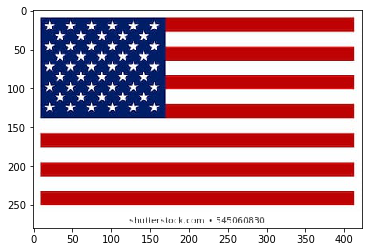

In [2]:
#read the image 
img = io.imread('american flag.jpg')
print(img.shape)
plt.imshow(img)

#only part of an image
img = img[:100,:100]

#Convert image into format for algorithm-----------
img_rows = img.shape[0]
img_colmns = img.shape[1]
pixels = img_rows*img_colmns 
features = img.shape[2] 

#assign the input image to "data"
data_input = np.zeros((pixels,features))
flag = 0
for i in range(img_rows): #image rows
    for j in range(img_colmns): #image columns
        for k in range(features): #features 
            data_input[flag,k] = img[i,j,k] #data's rows read down the img like a book (scan colmns then rows)
        flag = flag+1

(100, 100, 3)


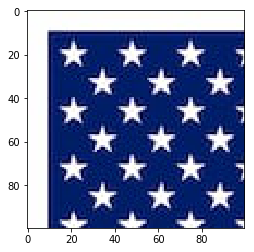

In [3]:
plt.imshow(img)
print(img.shape)

In [61]:
#MAIN SCRIPT----------------------
import time
start = time.time()

#Input parameters 
data_random = data_input  

#Define distance function calculation-------------------
def distance(featureset,centroid):
    #calculates the distance from a data pixel to centroid 
    distance_sum = 0
    for i in range(features):
        distance_sum = distance_sum + np.sum((featureset[i]-centroid[i])**2)
    dist = math.sqrt(distance_sum)
    return dist 
#------------------------------------------------------

radius = 10 #hard-code the radius ("bandwidth")

#making all the data points be initial clusters
initial_centroids = {}
for i in range(len(data_random)):
    initial_centroids[i] = data_random[i]

centroids = initial_centroids
x=0
while x<5:
    #identify new clusters 
    new_clusters = []
    clusters_dictionary = {} #create empty dictionary to house data assigned to different clusters 
    location_dictionary = {} #to store index locations of pixels for reshaping image later 
    for i in range(len(centroids)): #loop through clusters 
        within_radius = []
        location = []
        centroid = centroids[i]
        for featureset in range(len(data_random)): #identify if data are within radius for each cluster 
            feature = data_random[featureset]
            distan = distance(feature,centroid) #calculate distance 
            if distan < radius:
                within_radius.append(feature)
                location.append(featureset)

        clusters_dictionary[i] = within_radius #keeps track of the data assigned to each cluster 
        location_dictionary[i] = location 
        new_centroid = np.mean(within_radius,axis=0)
        new_clusters.append(tuple((new_centroid)))

    new_clusters_unique = sorted(list(set(new_clusters))) #create a set of "unique" clusters 
    centroids = new_clusters_unique 
    x=x+1


end = time.time()
print('time elapsed: ', end - start)

KeyboardInterrupt: 

time elapsed:  0.33014440536499023


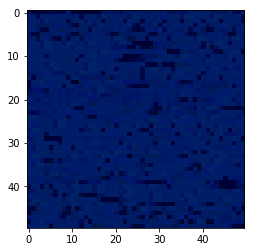

In [52]:
import time
start = time.time()
#Going to create data showing [data,features,cluster#,indexlocation]
#then sort the data by the index
#then assign the average centroid to the features per cluster #
#will have [data,centroid values]
#finally, convert back to image format 

number_of_clusters = len(clusters_dictionary)
clusters_assigned = []
for i in range(number_of_clusters):
    for j in range(len(clusters_dictionary[i])):
        clusters_assigned.append([clusters_dictionary[i][j],i]) #assign cluster # to data
        
location = []
for i in range(number_of_clusters):
    for j in range(len(location_dictionary[i])):
        location.append(location_dictionary[i][j]) #get locations

all_data = []
for i in range(pixels):
    all_data.append([clusters_assigned[i],location[i]]) #this is the data showing [data,feat,cluster,index]
    
#sort by index
def takeSecond(elem):
    return elem[1]

all_data_sorted = sorted(all_data, key=takeSecond) # sort list with key

#for different cluster numbers, assign features as the centroid
all_data_colored = []
for i in range(pixels):
    for j in range(number_of_clusters):
        if all_data_sorted[i][0][1] == j:
            all_data_colored.append(centroids[j]) #[data,centroid values]
            
#convert to image format and plot
new_img = np.zeros((img_rows,img_colmns,features))
flag = 0
for i in range(img_rows):
    for j in range(img_colmns):
        for m in range(features):
            new_img[i,j,m] = all_data_colored[flag][m]
        flag = flag+1
        
#plot
new_img = new_img.astype(np.int32)
plt.imshow(new_img)

end = time.time()
print('time elapsed: ', end - start)

In [45]:
clusters_dictionary
centroids

[(0.0, 0.0, 38.0),
 (0.0, 0.0, 44.0),
 (0.0, 0.8, 55.2),
 (0.0, 0.8, 56.0),
 (0.0, 0.8421052631578947, 56.21052631578947),
 (0.0, 1.1428571428571428, 56.476190476190474),
 (0.0, 4.0, 86.0),
 (0.0, 7.375, 77.125),
 (0.0, 7.625, 76.25),
 (0.0, 8.0, 90.0),
 (0.0, 10.2, 83.0),
 (0.0, 10.5, 82.33333333333333),
 (0.0, 10.6, 76.0),
 (0.0, 11.0, 76.0),
 (0.0, 11.5, 64.5),
 (0.0, 12.666666666666666, 92.33333333333333),
 (0.0, 13.0, 94.66666666666667),
 (0.0, 16.166666666666668, 77.0),
 (0.0, 16.857142857142858, 99.07142857142857),
 (0.0, 16.923076923076923, 98.76923076923077),
 (0.0, 17.142857142857142, 98.64285714285714),
 (0.0, 17.5625, 98.5),
 (0.0, 18.0, 98.75),
 (0.0, 24.666666666666668, 82.0),
 (0.0, 34.0, 123.0),
 (0.05, 1.3, 57.0),
 (0.07407407407407407, 3.5185185185185186, 59.407407407407405),
 (0.09375, 22.5625, 96.0),
 (0.09523809523809523, 19.38095238095238, 97.23809523809524),
 (0.11538461538461539, 20.846153846153847, 97.46153846153847),
 (0.13043478260869565, 20.0, 97.73913043478

In [25]:
len(location_dictionary)

218